6. Object detection using Transfer Learning of CNN architectures 


a. Load in a pre-trained CNN model trained on a large dataset 

b. Freeze parameters (weights) in model’s lower convolutional layers 

c. Add custom classifier with several layers of trainable parameters to model 

d. Train classifier layers on training data available for task 

e. Fine-tune hyper parameters and unfreeze more layers as needed


### Dataset : caltech

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

Pre processing image data

In [12]:
dataset_dir = "D:\PES MCOE\semester 7\DL\DL LP 4 Datasets\caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [13]:
# Selecting first batch containing 2000 images as train and second batch containing 2000 images as test data

x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


a. Load in a pre-trained CNN model trained on a large dataset

In [14]:
# Load VGG16 without top layers
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

b. Freeze parameters (weights) in model’s lower convolutional layers

In [15]:
for layer in base_model.layers:
       layer.trainable = False

c. Add custom classifier with several layers of trainable parameters to model

In [16]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

d. Train classifier layers on training data available for task

In [17]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


32/32 [==============================] - 50s 2s/step - loss: 3.9573 - accuracy: 0.2000 - val_loss: 3.3690 - val_accuracy: 0.3095
Epoch 2/10
32/32 [==============================] - 51s 2s/step - loss: 2.8874 - accuracy: 0.3895 - val_loss: 2.8863 - val_accuracy: 0.4005
Epoch 3/10
32/32 [==============================] - 51s 2s/step - loss: 2.3653 - accuracy: 0.4970 - val_loss: 2.6088 - val_accuracy: 0.4475
Epoch 4/10
32/32 [==============================] - 49s 2s/step - loss: 1.9724 - accuracy: 0.5665 - val_loss: 2.3928 - val_accuracy: 0.4795
Epoch 5/10
32/32 [==============================] - 49s 2s/step - loss: 1.6780 - accuracy: 0.6345 - val_loss: 2.2364 - val_accuracy: 0.5115
Epoch 6/10
32/32 [==============================] - 52s 2s/step - loss: 1.4530 - accuracy: 0.6790 - val_loss: 2.1632 - val_accuracy: 0.5205
Epoch 7/10
32/32 [==============================] - 52s 2s/step - loss: 1.2654 - accuracy: 0.7175 - val_loss: 2.0836 - val_accuracy: 0.5410
Epoch 8/10
32/32 [

e. Fine-tune hyper parameters and unfreeze more layers as needed

In [19]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# freeze all layers first
for layer in base_model.layers:
    layer.trainable = False

# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
    layer.trainable = True

# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 51s 2s/step - loss: 3.1233 - accuracy: 0.3475 - val_loss: 2.3931 - val_accuracy: 0.4920
Epoch 2/10
32/32 [==============================] - 50s 2s/step - loss: 1.8583 - accuracy: 0.5640 - val_loss: 1.9750 - val_accuracy: 0.5475
Epoch 3/10
32/32 [==============================] - 49s 2s/step - loss: 1.2155 - accuracy: 0.6910 - val_loss: 1.8570 - val_accuracy: 0.5710
Epoch 4/10
32/32 [==============================] - 49s 2s/step - loss: 0.7896 - accuracy: 0.7870 - val_loss: 1.8033 - val_accuracy: 0.5930
Epoch 5/10
32/32 [==============================] - 50s 2s/step - loss: 0.4868 - accuracy: 0.8610 - val_loss: 1.7547 - val_accuracy: 0.6135
Epoch 6/10
32/32 [==============================] - 50s 2s/step - loss: 0.3291 - accuracy: 0.9060 - val_loss: 1.8305 - val_accuracy: 0.6075
Epoch 7/10
32/32 [==============================] - 50s 2s/step - loss: 0.1967 - accuracy: 0.9430 - val_loss: 1.8431 - val_accuracy: 0.6265
Epoch 8/10
32/32 [==

In [25]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 21s 336ms/step


In [26]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  crayfish
Actual:  bass


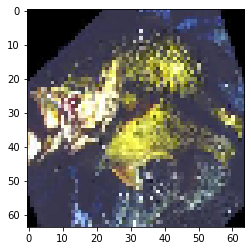

In [27]:
n = 20
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])